# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

Do the users spend more time on the new landing page than on the existing landing page?
Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
Does the converted status depend on the preferred language?
Is the time spent on the new page the same for the different language users?

## Import all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Reading the Data into a DataFrame

In [ ]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/abtest.csv')

Mounted at /content/drive


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
# returns the first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
# returns the last 5 rows
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
#100 total entries

In [ ]:
df.shape

(100, 6)

In [ ]:
#100 rows, 6 columns

In [ ]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [ ]:
#The mean amount of time spent on both pages was 5.38 minutes with a standard deviation of 2.38.
#Maximum amoutn of time spent on both pages was 1.71 minutes, and the minimum time spent was 0.19 minutes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
#No missing values in any column.
#User id is recognized as an integer - might have to be changed to object for data analysis since it is a categorical variable.
#Time spent on page is a float - this is good for data analysis.
#Everything else is an object, which is good.

In [ ]:
#Check for duplicates
df[df.duplicated()]

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred


In [ ]:
#No missing data

### Univariate Analysis

<Axes: xlabel='group', ylabel='count'>

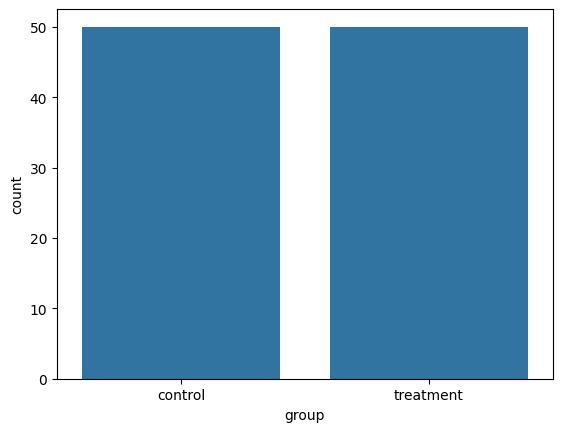

In [ ]:
#Creating a box plot to show how the participants were divided into each group
sns.countplot(data=df, x='group')

In [ ]:
#Confirm the exact values
df['group'].value_counts()

group
control      50
treatment    50
Name: count, dtype: int64

In [ ]:
#We see the participants were eavenly divided into control and treatment groups, with 50 participants in each

<Axes: xlabel='landing_page', ylabel='count'>

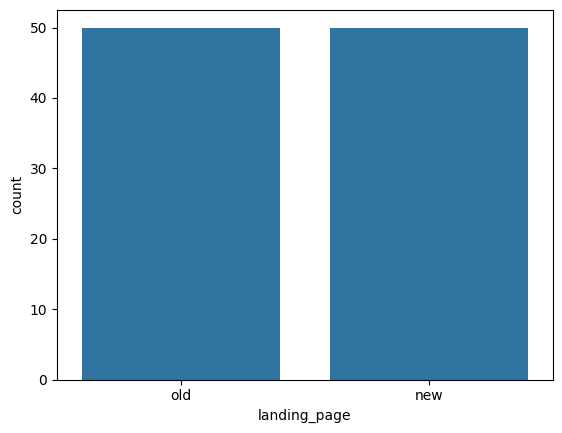

In [ ]:
#Creating a box plot to show how the participants were divided into each group (this should be divided the same as the previous graph)
sns.countplot(data=df, x='landing_page')

In [ ]:
#Confirm the exact values
df['group'].value_counts()

group
control      50
treatment    50
Name: count, dtype: int64

In [ ]:
#This is correct, since the paritcipants should be divided equally for both groups

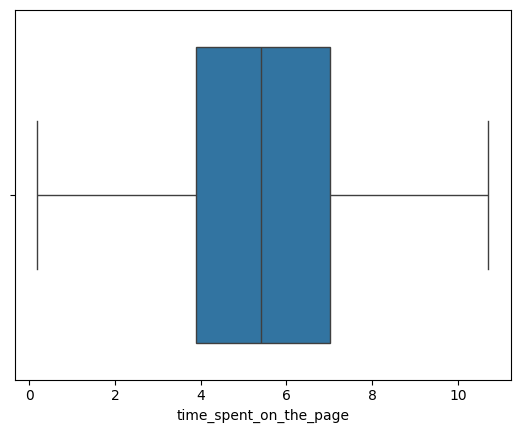

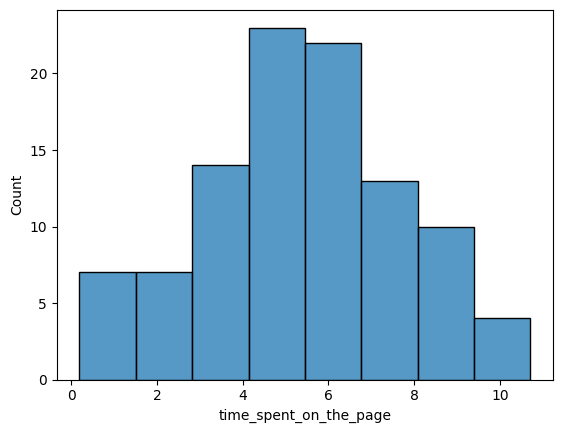

In [ ]:
#Create boxplot and histogram of the time spent on page
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()

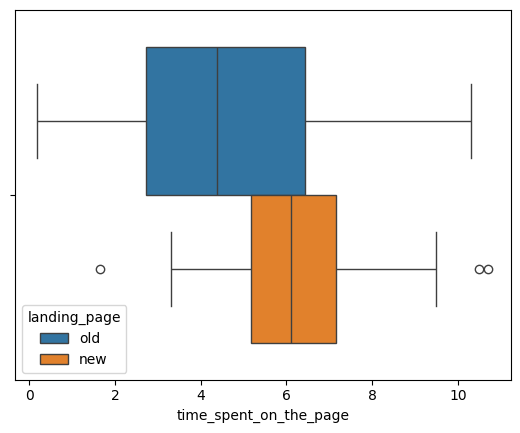

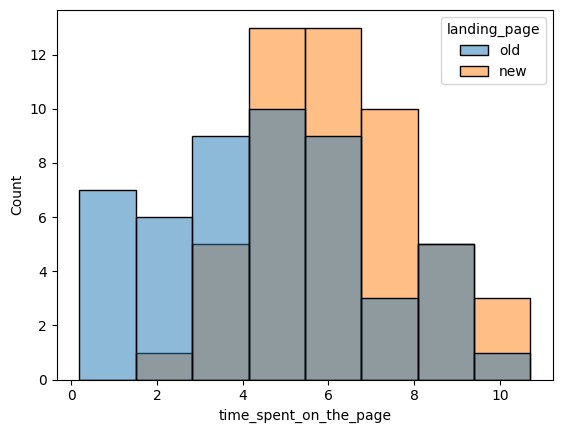

In [ ]:
#Create same graphs but with a hue of landing age to divide that data into groups of new versus old page
sns.boxplot(data=df,x='time_spent_on_the_page', hue='landing_page')
plt.show()
sns.histplot(data=df,x='time_spent_on_the_page', hue='landing_page')
plt.show()

In [ ]:
#This shows that customers are spending more time on the new landing page

<Axes: xlabel='converted', ylabel='count'>

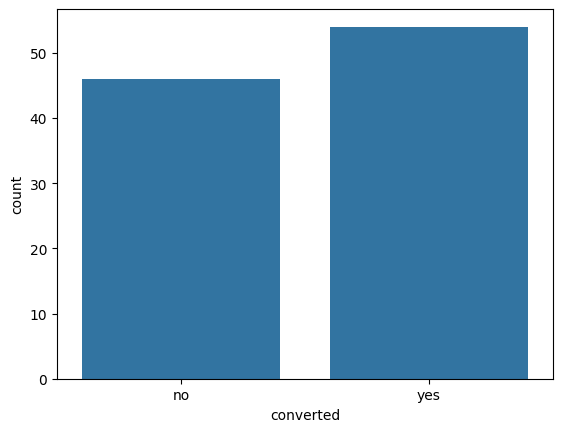

In [ ]:
#Create boxplot to see how many people converted after visiting one of the landing pages
sns.countplot(data=df, x='converted')

In [ ]:
#Check the exact values
df['converted'].value_counts()

converted
yes    54
no     46
Name: count, dtype: int64

In [ ]:
#54 people converted after visiting one of the landing pages.
#46 people did not convert after visiting one of the landing pages.

<Axes: xlabel='converted', ylabel='count'>

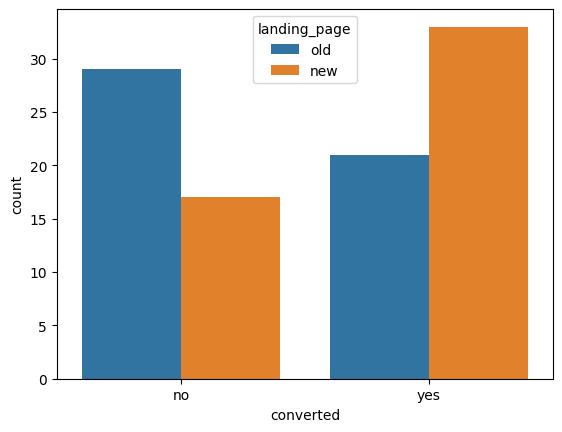

In [ ]:
#Create boxplot to see how many people converted after being on one of the landing pages with a hue for landing page
sns.countplot(data=df, x='converted', hue='landing_page')

In [ ]:
#This shows more people ended up converting when on the new page than the old page. This is an indication that the new page is working better.

<Axes: xlabel='language_preferred', ylabel='count'>

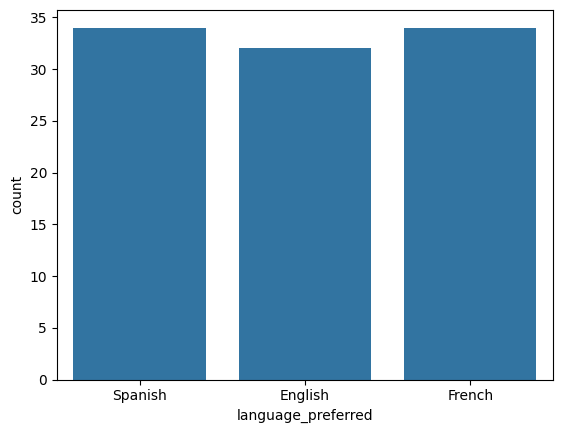

In [ ]:
#Create boxplot to see the different languages preferred for the website amongst participants
sns.countplot(data=df, x='language_preferred')

In [ ]:
#Check the exact values
df['language_preferred'].value_counts()

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64

In [ ]:
#Language preferrered is very eavenly spread out amongst participants.

<Axes: xlabel='language_preferred', ylabel='count'>

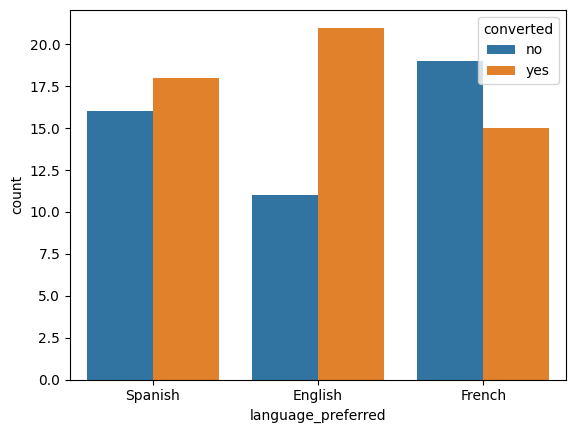

In [ ]:
#Adding a hue for converted on previous plot to see if language preferred is any indication of whether or not the participant converted
sns.countplot(data=df, x='language_preferred', hue='converted')

In [ ]:
#It looks like those who preferred English had a higher conversion rate.
#People who preferred French were less likely to convert.

### Bivariate Analysis

<Axes: xlabel='landing_page', ylabel='time_spent_on_the_page'>

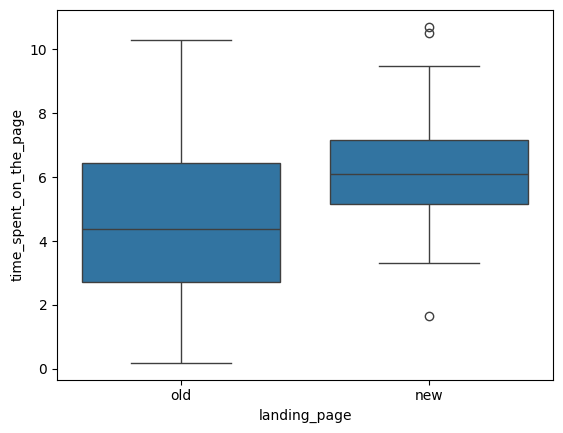

In [ ]:
#Create boxplot for landing page versus time spent on page
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')

In [ ]:
#The mean amount of time spent on the new landing page seems to be much higher than the mean amount of time spent on the old landing page.
#There also seems to be more variability in time spent on the old landing page.
#There are, however, pretty signficant outliers on both ends for time spent on the new landing page.
#The lack of outliers on the old landing page indicates that all values were within Q1 - 1.5 * IQR and Q3 + 1.5 * IQR.
#The outliers on the new landing page indicates that all values were not within Q1 - 1.5 * IQR and Q3 + 1.5 * IQR.

<Axes: xlabel='converted', ylabel='time_spent_on_the_page'>

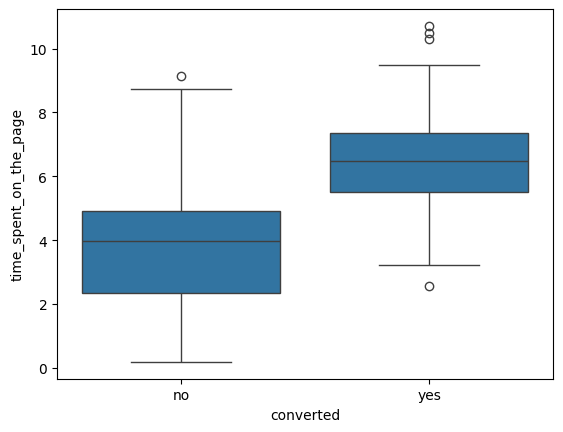

In [ ]:
#Create boxplot for converted versus time spent on page
sns.boxplot(data=df,x='converted',y='time_spent_on_the_page')

In [ ]:
#This shows that the longer time spent on the page, the more likely they were to convert.
#This tells us we should be focusing on keeping the participant on the page longer, to increase conversion rate.

<Axes: xlabel='language_preferred', ylabel='time_spent_on_the_page'>

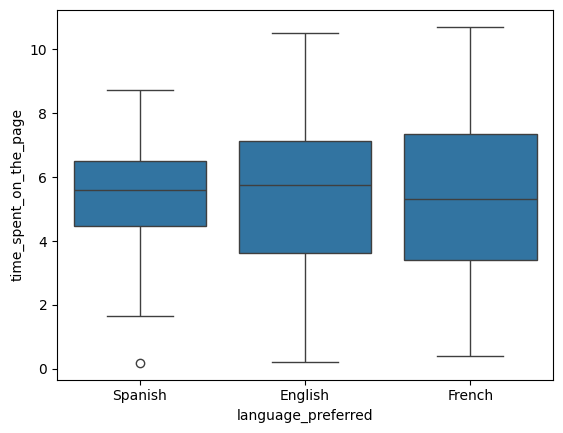

In [ ]:
#Create boxplot for language preferred versus time spent on page
sns.boxplot(data=df,x='language_preferred',y='time_spent_on_the_page')

In [ ]:
#Mean amount of time spent on pae is pretty similar across all languages.
#People who preferred Spanish had less variability in time spent on page.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

<Axes: xlabel='landing_page', ylabel='time_spent_on_the_page'>

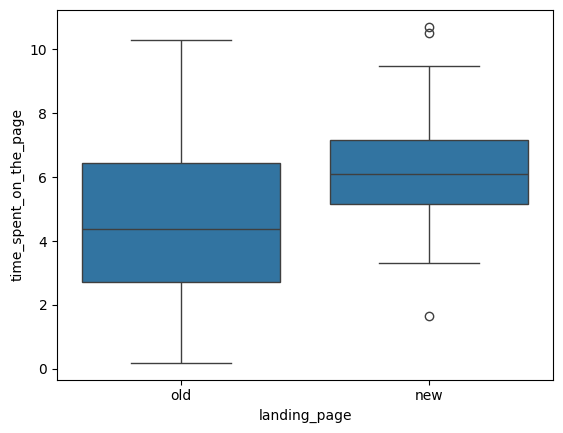

In [ ]:
#Create boxplot for landing page versus time spent on page
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')

### Step 1: Define the null and alternate hypotheses

H0: Users spend the same amount of time on the new landing page as the existing landing page (μ1 = μ2)

Ha: Users spend more time on the new landing page than the existing landing page (μ1 > μ2)

### Step 2: Select Appropriate test

The approprite test is a one-tailed, two-independept sample t-test because we are testing for equality of means between two populations (participants on existing landing page versus participants on new landing page). This is a one-tailed test because we are checking to see if the mean time for the new landing page is greater than the mean time for the old landing page, meaning we only need to chck one side of the distibution. This is a t-test, not a z-test since the population standard devations are unknown.

Check assumptions:
*   Continuous data - Yes, time is a continuous variable
*   Normally distributed populations - Check using Shapiro-Wilk’s test
*   Indpendent populations - Yes
*   Equal populations standard deviations - Check using Levene test
*   Random sampling from the population - we are informed in the problem that the participants were randomly selected.

### Step 3: Decide the significance level

The problem states we are testing at a 0.05 significance level, so α=0.05

### Step 4: Collect and prepare data

In [ ]:
new_time = df[df['landing_page']=='new']['time_spent_on_the_page']
old_time = df[df['landing_page']=='old']['time_spent_on_the_page']

In [ ]:
print(f"Mean amount of time spent on the new landing page (μ1):{new_time.mean()}\nMean amount of time spent on the old landing page (μ2):{old_time.mean()}")
print(f"Sample standard deviation of time spent on the new landing page (σ1):{new_time.std()}\nSample standard deviation of time spent on the old landing page (σ2):{old_time.std()}")

Mean amount of time spent on the new landing page (μ1):6.2232
Mean amount of time spent on the old landing page (μ2):4.532400000000001
Sample standard deviation of time spent on the new landing page (σ1):1.8170310387878263
Sample standard deviation of time spent on the old landing page (σ2):2.581974849306046


Shapiro-Wilk’s test
*   𝐻0:  The time spent on the page follow a normal distribution
*   𝐻𝑎:  The time spent on the page do not not follow a normal distribution

α=0.05

In [ ]:
#Check normally distributed population assumption
#Use the shapiro function for the scipy.stats library for this test
import scipy.stats as stats

#find the p-value
w, p_value = stats.shapiro(df['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.5643193125724792


The p-value is greater than 0.05, so we fail to reject the null hypothesis, meaning the data is normally distributed

Levene’s test
*   𝐻0 : All the population variances are equal
*   𝐻𝑎 : At least one variance is different from the rest

α=0.05

In [ ]:
#Check equality of population variances assumption
#use levene function from scipy.stats library for this test

# find the p-value
statistic, p_value = stats.levene(new_time, old_time)
print('The p-value is', p_value)

The p-value is 0.008950671168914447


This p-value is less than 0.05, so we reject the null hypothesis, meaning the variances are not equal. This means we need to use the unequal variances version of the independent samples t-test.

### Step 5: Calculate the p-value

In [ ]:
t_statistic, p_value = stats.ttest_ind(new_time, old_time, equal_var=False)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 3.7867702694199856
p-value: 0.0002784762450333098


The p-value is 0.0003.

### Step 6: Compare the p-value with $\alpha$

The p-value is 0.0003, which is much less than 0.05, so we reject the null hypothesis.

### Step 7:  Draw inference

We reject the null hypothesis. This means users do spend more time on the new landing page than the existing landing page (μ1 > μ2).

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

In [ ]:
#Create contingency table to see difference between conversion rate for each group
pd.crosstab(df['landing_page'],df['converted'], margins=True)

converted,no,yes,All
landing_page,,,
new,17,33,50
old,29,21,50
All,46,54,100


H0: The conversion rate for the new page is the same as the conversion rate for the old page (p1 = p2).

Ha: The conversion rate for the new page is the greater than the conversion rate for the old page (p1 > p2).

This is a two-proportions z-test, since I am comparing two proportions from 2 independent populations. This is a one-tailed test because I am testing whether one proprtion is larger than the other.

Assumptions for two-proportions z-test:
*   binomially distributed data - Yes, either the participants viewed the new page or the old page.
*   Independent populations - Yes
*   random sampling from the population - Yes
*   Can the binomial distribution be approximated to a normal distribution? Yes, np and n(1-p) are greater than or equal to 10.



The problem states we are testing at a 0.05 significance level, so α=0.05

In [ ]:
#Create variable for the poeple who did convert using each website
converted_new = df[df['landing_page'] == 'new']['converted'].value_counts()['yes']
converted_old = df[df['landing_page'] == 'old']['converted'].value_counts()['yes']
print("Number of people who converted after visiting the new page:", converted_new)
print("Number of people who converted after visiting the old page:", converted_old)

#Total number of participants using each website
total_new = df['landing_page'].value_counts()['new']
total_old = df['landing_page'].value_counts()['old']
print("Total number of participants using new website:", total_new)
print("Total number of participants using old website:", total_old)

Number of people who converted after visiting the new page: 33
Number of people who converted after visiting the old page: 21
Total number of participants using new website: 50
Total number of participants using old website: 50


In [ ]:
#Import required function
from statsmodels.stats.proportion import proportions_ztest

#Use function to find p-value
test_stat, p_value = proportions_ztest([converted_new, converted_old] , [total_new, total_old], alternative ='larger')
print(p_value)

0.008026308204056278


The p-value is smaller than the level of significance, 0.05, so we reject the null. This means the conversion rate for the new page is greater than the conversion rate for the old page.

## 3. Is the conversion and preferred language independent or related?

In [ ]:
#Create contingency table to see difference between conversion rate for each group of language preference
c_table = pd.crosstab(df['language_preferred'],df['converted'], margins=True)

In [ ]:
#Seems like people who preferred English were more likely to convert, while French speakers were least likely.

H0: The conversion and preferred language are independent.

Ha: The conversion and preferred language are not independent.

The appropriate test is a chi-square test of independence.

Chi-Square test of Independence Assumptions:
*   Testing categorical variables? Yes, language preferred and whether or not the participant converted are both categorical variables.
*   Expected value of the number of sample obseravtions in each level of the variable is at least 5? Yes, according to the contingency table above, no numbers are below 5.
*   Random sampling from the population? Yes



The problem states we are testing at a 0.05 significance level, so α=0.05

In [ ]:
#Import the chi-square test function
from scipy.stats import chi2_contingency

#Use function to find p-value and determine independence
chi2, p_value, dof, exp_freq = chi2_contingency(c_table)

print(p_value)

0.7970832186581234


The p-value is 0.797, which is much larger than our level of significance, 0.05, so we fail to reject the null hypothesis. This means that preferred language and conversion rate our independent variables.

In [ ]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


## 4. Is the time spent on the new page the same for the different language users?

In [ ]:
#Creating a new dataframe that only includes data from participants who used the new page
new = df[df['landing_page']=='new']
#ensuring new dataframe has the correct number of datapoints
new.shape

(50, 6)

H0: Mean amount of time spent on the new page is the same for all language users (μ1 = μ2 = μ3).

Ha: At least one mean amount of time spent on the new page between different languange users is different (μ1 ≠ μ2 or μ1 ≠ μ3 or μ2 ≠ μ3).

The appropriate test is a one-way Analysis of Variance (ANOVA) because this test determines whether the means of more than 2 independent populations are significantly different, and for this test we need to determine if the means between 3 groups (different languages) are significantly different. We are doing a one-way because we are comparing these means with one other factor.

ANOVA Assumptions:
*   The populations are normally distributed - Test using Shapiro-Wilk's test on response variable, time spent on the new page.
*   Samples are independent simple random samples - Yes
*   Population variables are equal - Test using Levene test on response variable, time spent on the new page.


The problem states we are testing at a 0.05 significance level, so α=0.05.

Shapiro-Wilk’s test
*   𝐻0:  The time spent on the page follow a normal distribution
*   𝐻𝑎:  The time spent on the page do not not follow a normal distribution

α=0.05

In [ ]:
#Check normally distributed population assumption
#Use the shapiro function for the scipy.stats library for this test
import scipy.stats as stats

#find the p-value
w, p_value = stats.shapiro(df[df['landing_page']=='new']['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.8040016293525696


This p-value is much higher than the level of significance, 0.05, so we fail to reject the null hypothesis, meaning the data is normally distributed. So,the assumption for normal distribution is confirmed.

Levene’s test
*   𝐻0 : All the population variances are equal
*   𝐻𝑎 : At least one variance is different from the rest

α=0.05

In [ ]:
Spanish_time = new[new['language_preferred']=='Spanish']['time_spent_on_the_page']
English_time = new[new['language_preferred']=='English']['time_spent_on_the_page']
French_time = new[new['language_preferred']=='French']['time_spent_on_the_page']

In [ ]:
#Check equality of population variances assumption
#use levene function from scipy.stats library for this test

# find the p-value
statistic, p_value = stats.levene(Spanish_time, English_time, French_time)
print('The p-value is', p_value)

The p-value is 0.46711357711340173


This p-value is higher than the level of significance, 0.05, so we fail to reject the null hypothesis, meaning all population variances are equal. So,the assumption for equal variances is confirmed.

In [ ]:
#Import one-way ANOVA function
from scipy.stats import f_oneway

#Use function to find p-value
test_stat, p_value = f_oneway(Spanish_time, English_time, French_time)

print(p_value)

0.43204138694325955


The p-value is higher than our level of significance, 0.05, so we fail to reject the null hypothesis. This means that the amount of time spent on the new page is the same for all language users (μ1 = μ2 = μ3).

If we did reject the null, we could have used the multiple comparison (Tukey HSD) test to identify which mean  time spent on the new page between different languange users is different. Although we failed to reject the null, this is how that test would be performed:

H0: μ1 = μ2 and μ1 = μ3 and μ2 = μ3.

Ha: μ1 ≠ μ2 or μ1 ≠ μ3 or μ2 ≠ μ3.

α=0.05

In [ ]:
#import the required function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#Use multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = new['time_spent_on_the_page'], groups = new['language_preferred'], alpha = 0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
English  French  -0.4673 0.7434 -2.0035  1.069  False
English Spanish  -0.8285 0.3995 -2.3647 0.7078  False
 French Spanish  -0.3612 0.8326  -1.874 1.1516  False
-----------------------------------------------------


This confirms that no two languages has significantly different mean amount of times spent on the new website.

## Conclusion and Business Recommendations

Conclusion:
*   The time users spent on the new page was much higher than the time users spent on the existing page.
*   Separating the data by people that converted and did not convert, showed us that the people that did convert spent much more time on either website they were assigned to than the alternative group.
*   Using a one-tailed two independent sample t test, we revealed that users do spend a significantly larger amount of time on the new landing page than the existing landing page (μ1 > μ2).
*   Using a two-proportions z-test, we found that the conversion rate for the new page is significantly greater than the conversion rate for the old page.
*   Using a Chi-Square test of Independence, we found that preferred language and conversion rate our independent variables.
*   Using a One-Way Analysis of Variance (ANOVA) test, we found that the amount of time spent on the new page is the same for all language users (μ1 = μ2 = μ3).

Business Recommendations:
*   Since people that did convert spent much more time on either website they were assigned to than the alternative group, I recommend focusing on trying to get users to spend more time on the website, as that could lead to a higher chance they convert to a subscriber.
*   We also learned that the new website has a significantly higher mean amount of time users spent on it, meaning that the new website is achieving the previous goal. Therefore, this website seems to be more successful, and I would recommend switching to this website entirely.
*   We also found that the conversion rate for the new website was significantly higher than the old one, once again confirming the newer website's greater success than the existing website. Therefore, I believe the company would get many more subscribers by switching to the new website.
*   Since there was not much of a difference between language used and conversion rate or the time spent on the website, I do not recommend trying to market towards specific groups based on preferred language, as all are equally likely to convert to subscribers.

___

In [ ]:
!jupyter nbconvert PROJECT2.ipynb --to html

[NbConvertApp] Converting notebook PROJECT2.ipynb to html
[NbConvertApp] Writing 963207 bytes to PROJECT2.html
